# Job Salary Prediction 
##  1. Load libraries and read the data
   - 1.1. Load libraries
   - 1.2. Read the data
   - 1.3. Variables and Assignment<br>
    
##  2. Overall visualization
   - 2.1. Frequency of Salary
   - 2.2. Words Frequency in Job Title
   - 2.3. Percentage of Top 20 Job Category
   - 2.4. Salary Distribution of Top 10 Job Categories
   - 2.5. Average salary per Category
   - 2.6. Average salary per Company
   - 2.5. Average salary of locations Map
  

##  3. Top 3 visualization(IT, Engineer, Finiance)
   - 3.1. The 10 Highest Average Salary Companies per Catagory<br>
   - 3.2. Number of Engineer jobs of locations
   - 3.3. Top 3 Average Salary of locations

##  4. Conclusion 
========================================================================================================================



# 1. Load libraries and read the data
## 1.1. Load libraries
           
In this project we use lots of packages not only introduced in the classes but from the third parties. Python has many powerful packages we can use for free and we mainly use numpy and pandas to analysis our data. For plotting, we basically use plotly and matplotlib to visualize our dataset.
   

In [1]:
####### MAIN LOOP ########
import shlex
import csv
import numpy as np
import plotly
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import conda
import seaborn as sns
from matplotlib import cm
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from IPython.display import Image
from collections import Counter
from plotly.offline import *
from pyecharts import Pie,configure # need to be installed
from wordcloud import WordCloud # need to be installed first

warnings.filterwarnings("ignore")
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'Library'), 'share')
proj_lib
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
%run self_defined_function.ipynb


## 1.2. Read the data

As you can see there are 200 thousand more data points with many dimensions like Id, Title, etc.



In [2]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\Train_rev1.csv')
display(data.head())
display(data.describe())
display(data.shape)
display(data.info())

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


,Id,SalaryNormalized
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


(244768, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
Id                    244768 non-null int64
Title                 244767 non-null object
FullDescription       244768 non-null object
LocationRaw           244768 non-null object
LocationNormalized    244768 non-null object
ContractType          65442 non-null object
ContractTime          180863 non-null object
Company               212338 non-null object
Category              244768 non-null object
SalaryRaw             244768 non-null object
SalaryNormalized      244768 non-null int64
SourceName            244767 non-null object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


None

## 1.3. Variables and Assignment
Reads the data from the excel file and organizes it into a readable list.<br>

Calculates the salary per whatever catergory you provide to the function. For example will compute the average salary and max salary for locations. It will also print out the top 20 in terms of frequencyf or that category. Ex: Top 20 job categories.<br>

Example output of number of job listings for the top 20 companies:<br>
{'': 32430, 'Hays': 1784, 'Perfect Placement': 865, 'JOBG8': 841, 'Penguin Recruitment': 752, 'Page Personnel Finance': 536, 'UKStaffsearch': 4997, 'Michael Page Finance': 634, 'Randstad': 748, 'London4Jobs': 2345, 'BMS Sales Specialists LLP': 559, 'Adecco': 701, 'CVbrowser': 2977, 'JAM Recruitment Ltd': 1122, 'Office Angels': 961, 'Jobsite Jobs': 932, 'ARRAY': 847, 'COREcruitment International': 551, 'Adecco Group': 592, 'Matchtech Group plc.': 834}

In [3]:
features, salaries=[], []
headers = {}

read_data_from_excel()
avg_salary_dict, max_salary_dict, top_20, category_salaries = salary_per_category('Category')
Top10 = generate_top_10_Company_per_Category(data)


values = list(top_20.values())
labels = list(top_20.keys())


Reading data...
Done!


# 2. Overall visualization
## 2.1. Frequency of Salary
In order to realize the job salaries in UK, we first look at how the salary looks like.
The range of salaries are from less than 25k to 200k. It's a big range!!!<br>
Of course there are different level of jobs we can find in this dataset. However, the salary are 
concentrated between 25K to 75K.


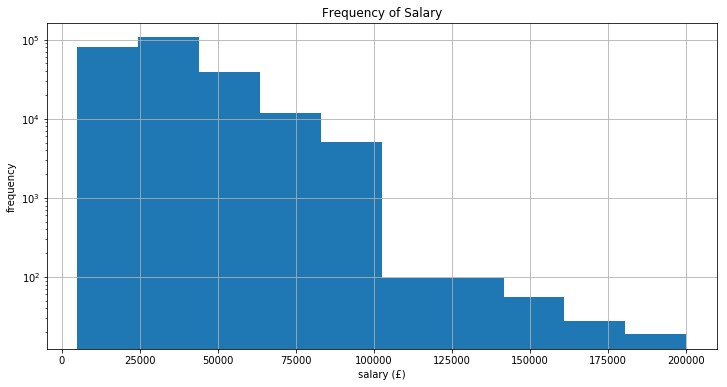

In [4]:
Salary_frequency()

## 2.2. Words Frequency in Job Title
It is easy to understand when we are looking for a job, we'll look at the job title first. Here we count all the words appeared in the job titles and list top 50 as you can see below. The word "Manager" has the most frequency number and "Engineer" is in the second place.

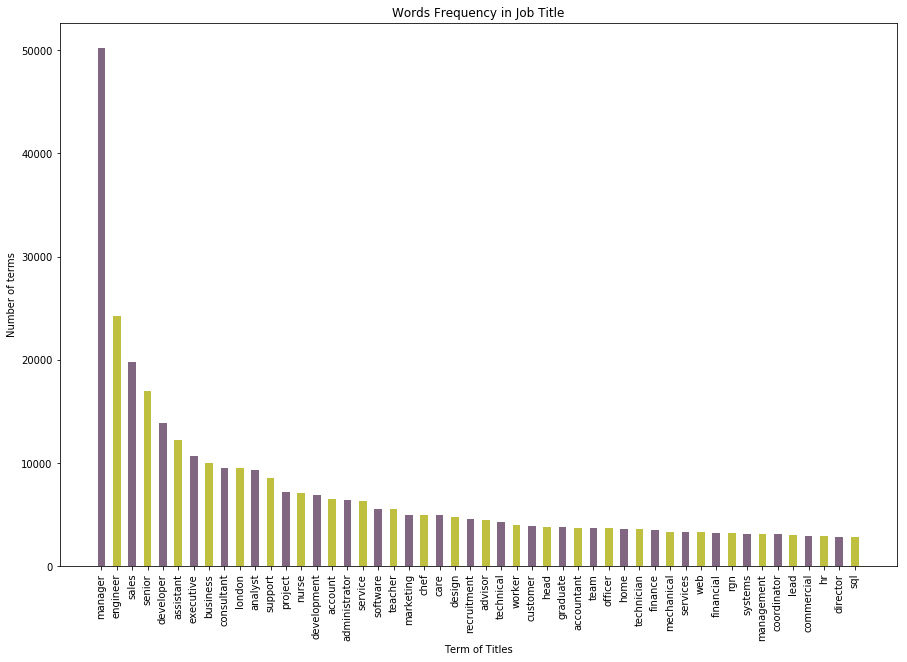

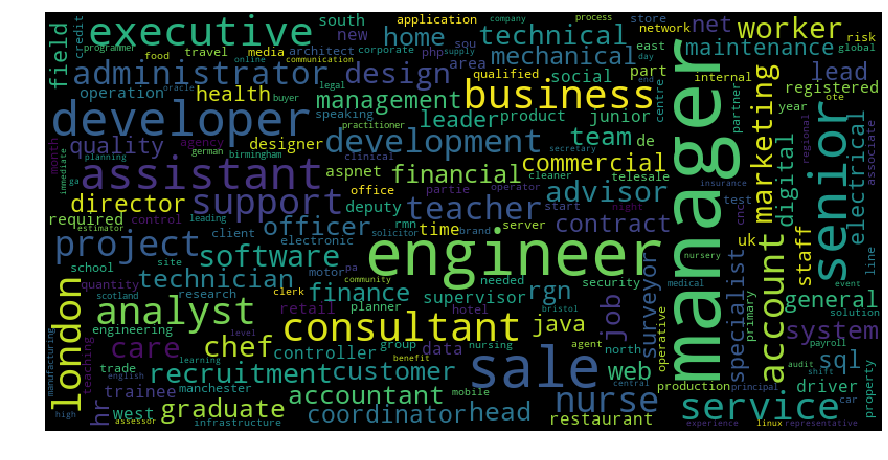

In [5]:
job_titles_plots()

## 2.3. Percentage of Top 20 Job Category
We plot the percentage of top 20 Job Categories. The IT jobs account for 16.61% in the top 20. Both of Engineering and Finance account for roughly 10%. As a result, we will focus on discussing the top there categories, IT jobs, Engineering jobs and Accounting & Finance jobs, in the section 3.

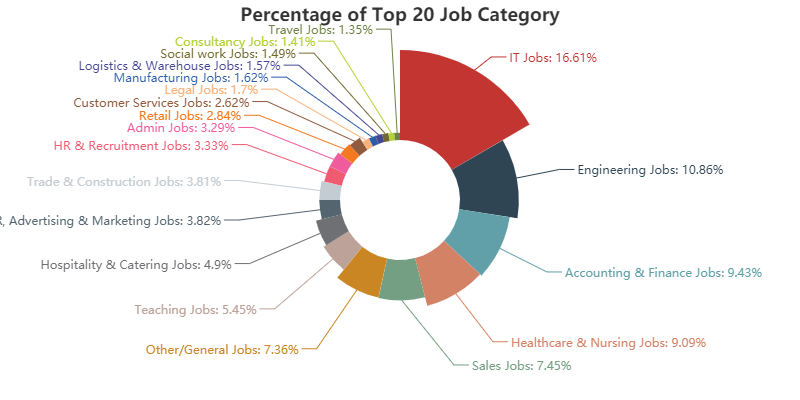

In [14]:
configure(output_image=True)
pie =Pie('Percentage of Top 20 Job Category',background_color = 'white',title_pos='center')
pie.add('radius', labels, values, center = [50, 50], radius=[30, 75], rosetype='radius',
        is_legend_show = False, is_label_show = True
       )
Image(filename='Top20.PNG') 

## 2.4. Salary Distribution of Top 10 Job Categories
By using the salary per catagory, we can get the important information which can help us estimate the distribution of the job catagories. It is easy to understant it by plotting box plot. We plot 10 categories and start to analyze it. You can see that the finance has top salary among all the jobs and IT job has the highest average salary.

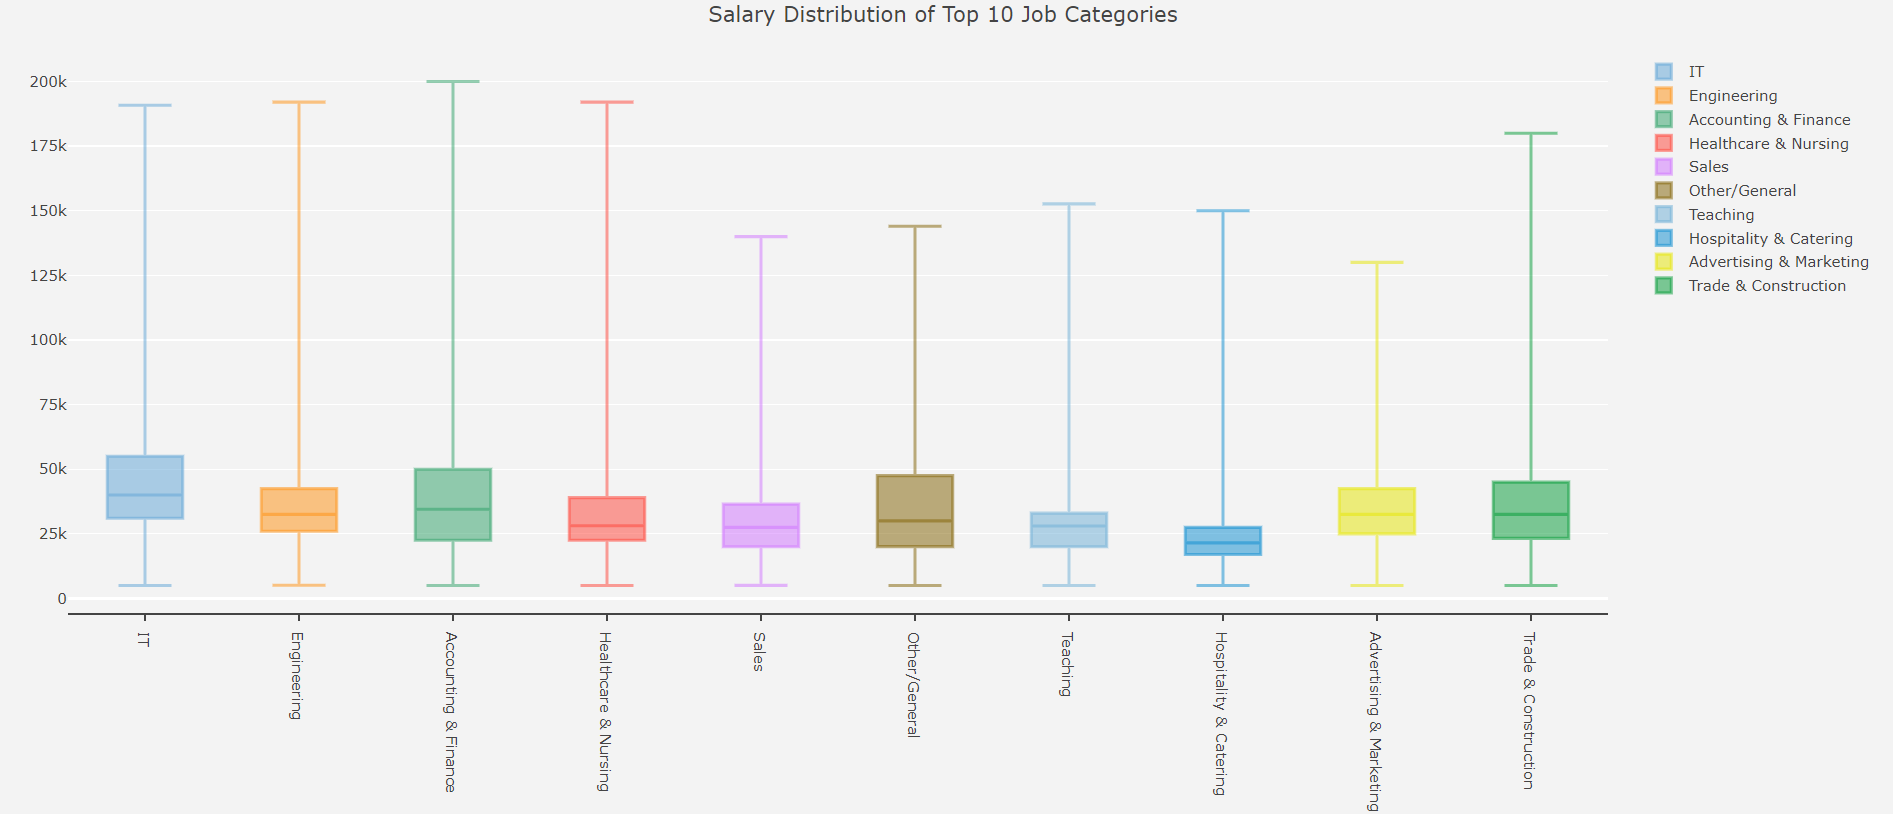

In [7]:
boxplot(top_20, category_salaries)
Image(filename='BOX_PLOT.PNG') 

## 2.5. Average salary per Category
We also build the average salary list per category and company. In figure 2.5, once again, we can see that IT jobs has the highest average salary. Furthermore, in figure 2.6, Matchtech Group plc. has the highest  average pay for their employee.

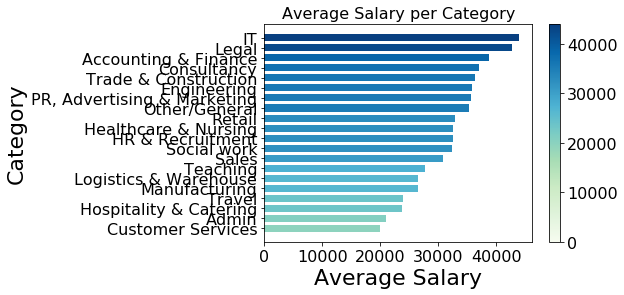

In [8]:
ctg1=['Customer Services', 'Admin', 'Hospitality & Catering', 'Travel', 'Manufacturing', 'Logistics & Warehouse', 'Teaching', 'Sales', 'Social work', 'HR & Recruitment', 'Healthcare & Nursing', 'Retail', 'Other/General', 'PR, Advertising & Marketing', 'Engineering', 'Trade & Construction', 'Consultancy', 'Accounting & Finance', 'Legal', 'IT']
slr1=[19861, 21053, 23702, 23838, 26497, 26497, 27671, 30814, 32381, 32589, 32589, 32955, 35346, 35593, 35838, 36406, 37028, 38751, 42649, 43983]

data_color = [x / max(slr1) for x in slr1]

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
sm = ScalarMappable(cmap=my_cmap,norm=plt.Normalize(0, vmax=max(slr1)))
sm.set_array([])
cbar = plt.colorbar(sm)

width=0.7

plt.barh(ctg1,slr1,width,color=colors)
plt.xlabel('Average Salary')
plt.ylabel('Category')
plt.title('Average Salary per Category',fontsize=16)
plt.show()

## 2.6. Average salary per Company

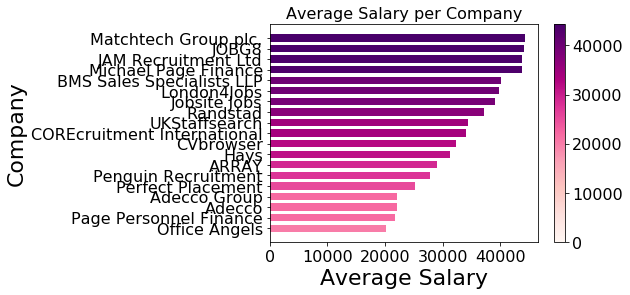

In [9]:
cpn1=['Office Angels', 'Page Personnel Finance', 'Adecco', 'Adecco Group', 'Perfect Placement', 'Penguin Recruitment', 'ARRAY', 'Hays', 'CVbrowser', 'COREcruitment International', 'UKStaffsearch', 'Randstad', 'Jobsite Jobs', 'London4Jobs', 'BMS Sales Specialists LLP', 'Michael Page Finance', 'JAM Recruitment Ltd', 'JOBG8', 'Matchtech Group plc.']
slr1=[20205, 21814, 22013, 22097, 25267, 27803, 29000, 31333, 32338, 34077, 34462, 37150, 39092, 39812, 40068, 43765, 43815, 44138, 44291]
data_color = [x / max(slr1) for x in slr1]


my_cmap = plt.cm.get_cmap('RdPu')
colors = my_cmap(data_color)
sm = ScalarMappable(cmap=my_cmap,norm=plt.Normalize(0, vmax=max(slr1)))
sm.set_array([])
cbar = plt.colorbar(sm)

width=0.7
plt.barh(cpn1,slr1,width,color=colors)
plt.xlabel('Average Salary')
plt.ylabel('Company')
plt.title('Average Salary per Company',fontsize=16)
plt.show()

## 2.7. Average salary of locations Map
Classify salary by locations. Generate UK map and color this map by average salary of locations.<br>
Location is an important factor which can affect average salary. As we can see from picture, the area near London has a relatively higher average salary. (Because our dataset does not include all area in UK, there are some white blocks.)

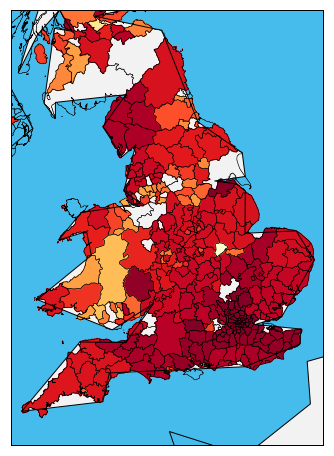

In [10]:
%run Map1.ipynb
colorMap(readData())

# 3. Top 3 visualization(IT, Engineer, Finiance)
## 3.1. The 10 Highest Average Salary Companies per Catagory
This plot clearly shows that if you want to get the highest salary, you have to study accounting and finance relating majors. If you want to get a good salary, Engineering will be your best choice because you the top 10 companies of Engineering jobs are way beyond other categories.

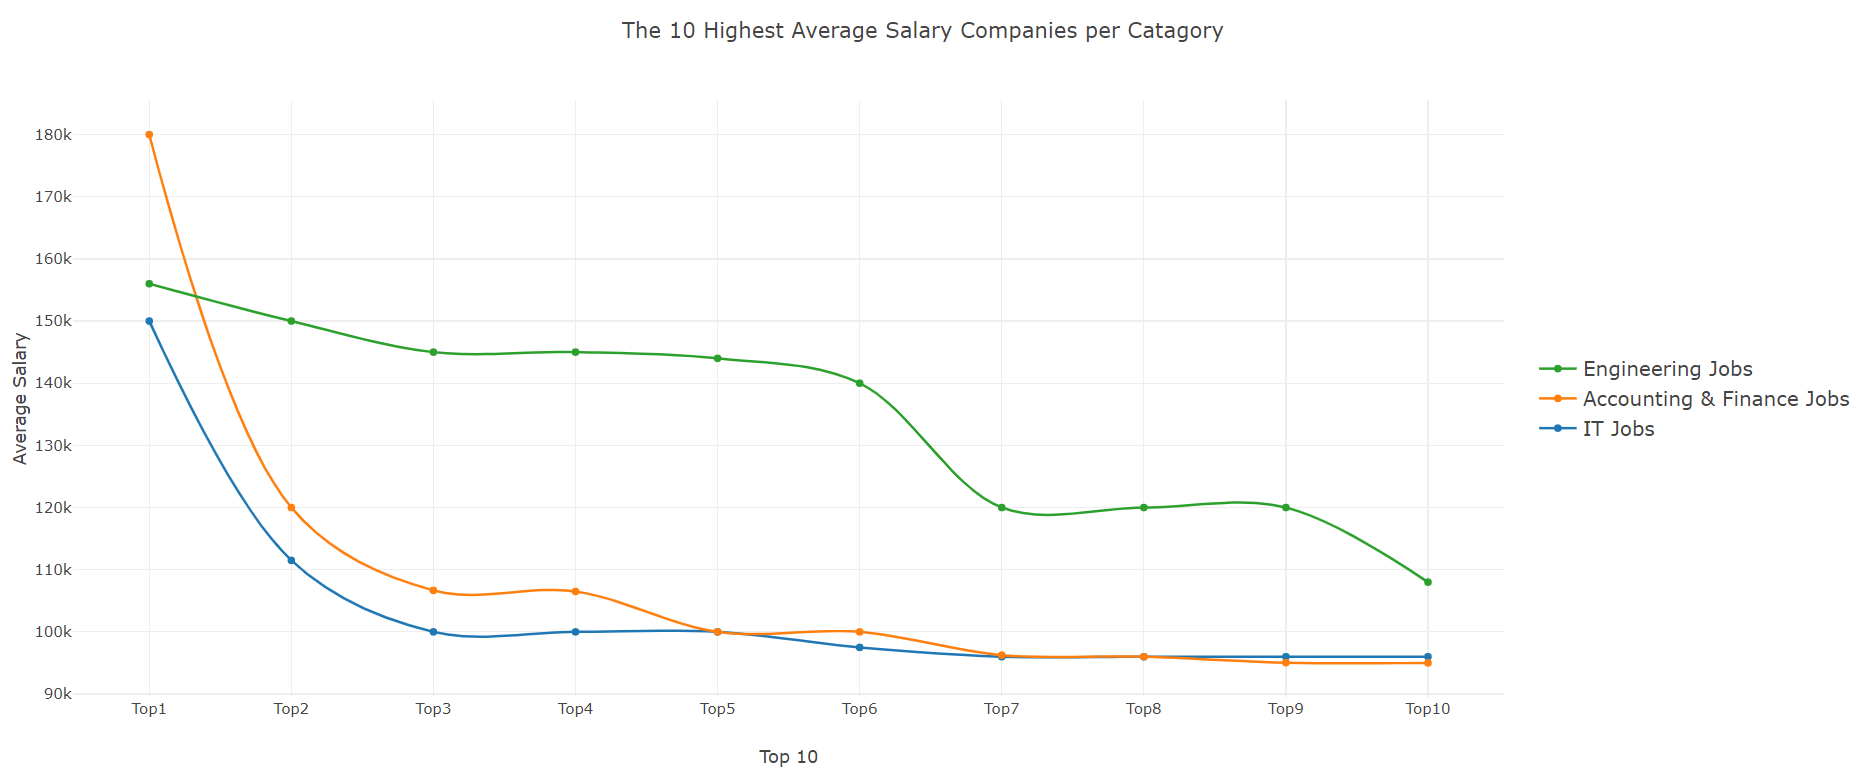

In [11]:
Top3_line_chart(Top10)
Image(filename='line_chart.PNG') 

## 3.2. Number of Engineer jobs of locations
The number of jobs varies with location. Similarly, areas near London have a large number of jobs. During finding job, location is one of the most important factors which we have to consider and the area near London is good choice.

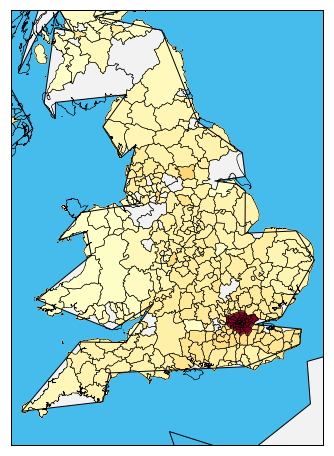

In [12]:
%run Map2.ipynb
colorMap(readData())

## 3.3. Top 3 Average Salary of locations
In order to find the relationship of average salary job, we choose three representative job category which have the largest number of jobs. As we can see from above three picture, the average salary of IT jobs and Engineering jobs maintain similar in different. On the other hand, average salary of Accounting & Finance Jobs change changed a lot in different location. Therefore, while seeking IT jobs or Engineering jobs, we can ignore location factor, but while seeking Accounting & Finance Jobs, we should pay more attention to location.

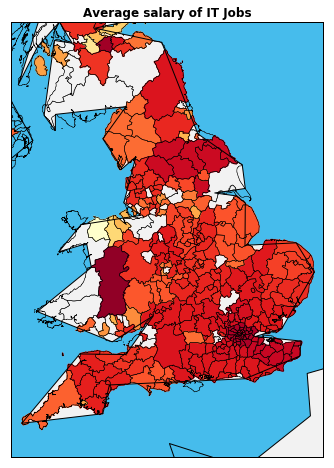

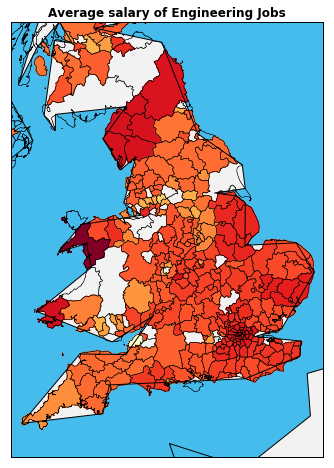

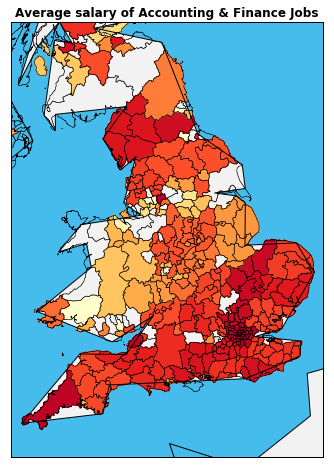

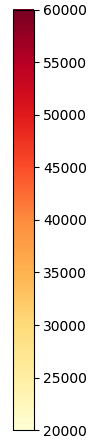

In [13]:
%run Map3.ipynb
colorMap(readData('IT Jobs'),'Average salary of IT Jobs')
colorMap(readData('Engineering Jobs'),'Average salary of Engineering Jobs')
colorMap(readData('Accounting & Finance Jobs'),'Average salary of Accounting & Finance Jobs')
Image(filename='bar.png')

# 4. Conclusion

- IT jobs are both the most frequent category of job and also have the highest average salary
- “Manager” was the most likely job title that these listing were looking for
- The city of London is the best place to find the highest paying jobs and also has the most job opportunities
- Engineering jobs and IT jobs can be found everywhere whereas finance jobs are mostly found in the major cities

In this project, we learn how to plot different types of graphs. It's also very important to know the skills about data analysis. 